In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
datos = pd.read_csv(r'C:\Users\ryzen 5\Desktop\UNAD\cuarto semestre\ANALIZIS DE DATOS\SEGUNDA FASE\tarea 2\Anexo 3 - Dataset Heart Disease Cleveland UCI\heart_cleveland_upload.csv')

In [4]:
# Mostrar el resumen estadístico de todas las variables numéricas
print(datos.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

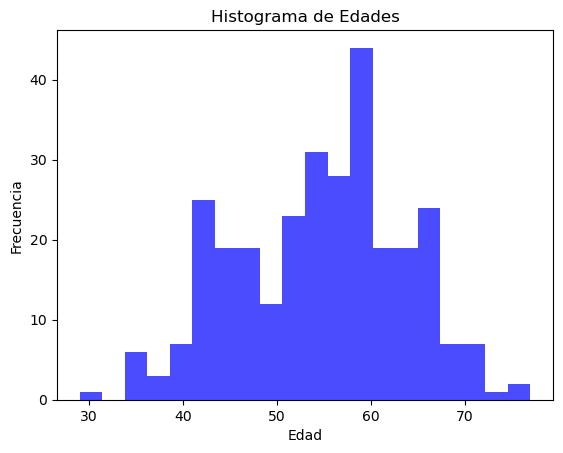

In [7]:
import matplotlib.pyplot as plt

# Histograma de la columna 'age'
plt.hist(datos['age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()

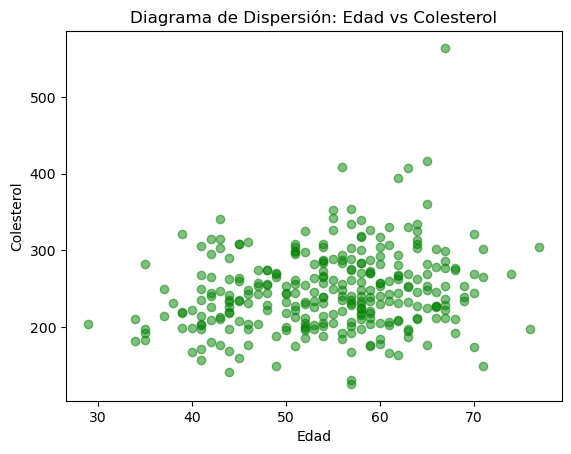

In [9]:
import matplotlib.pyplot as plt

# Diagrama de dispersión entre 'age' y 'chol'
plt.scatter(datos['age'], datos['chol'], color='green', alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.title('Diagrama de Dispersión: Edad vs Colesterol')
plt.show()


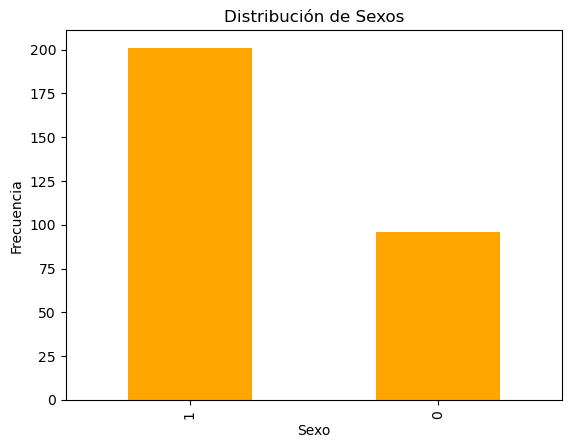

In [14]:
import matplotlib.pyplot as plt

# Gráfico de barras para la columna 'sex'
datos['sex'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sexos')
plt.show()

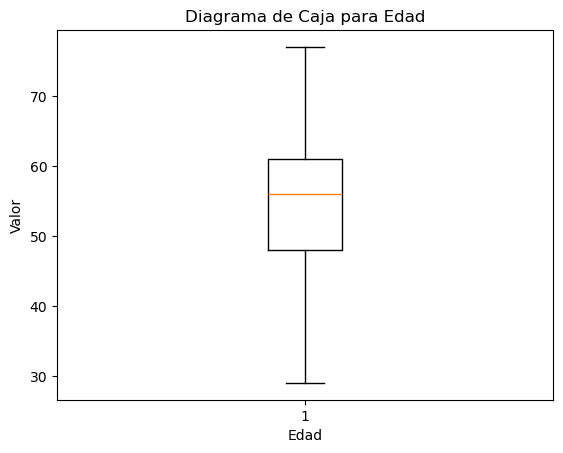

In [16]:
import matplotlib.pyplot as plt
# Diagrama de caja para la columna 'age'
plt.boxplot(datos['age'])
plt.title('Diagrama de Caja para Edad')
plt.xlabel('Edad')
plt.ylabel('Valor')
plt.show()


In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [18]:
# Tratar valores faltantes
imputer = SimpleImputer(strategy='mean')  # puedes cambiar 'mean' por 'median', 'most_frequent', etc.
datos_sin_nulos = imputer.fit_transform(datos)

In [19]:
# Transformar datos categóricos
datos_categoricos = datos[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']]
encoder = OneHotEncoder()
datos_categoricos_codificados = encoder.fit_transform(datos_categoricos)

In [20]:
# Normalizar/estandarizar datos numéricos
datos_numericos = datos[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
scaler = StandardScaler()
datos_numericos_normalizados = scaler.fit_transform(datos_numericos)

In [21]:
# Combinar datos transformados
datos_procesados = np.concatenate((datos_numericos_normalizados, datos_categoricos_codificados.toarray()), axis=1)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [30]:
X = datos[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']]
y = datos['condition']  # Reemplaza 'target_variable' por el nombre real de tu variable objetivo


In [34]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
282,43,1,3,120,177,0,2,120,1,2.5,1,0,2,1
81,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0
108,54,1,2,120,258,0,2,147,0,0.4,1,0,2,0
146,42,1,2,130,180,0,0,150,0,0.0,0,0,0,0
217,58,1,3,146,218,0,0,105,0,2.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,53,0,3,130,264,0,2,143,0,0.4,1,0,0,0
192,61,1,3,120,260,0,0,140,1,3.6,1,1,2,1
117,52,1,2,172,199,1,0,162,0,0.5,0,0,2,0
47,52,1,1,134,201,0,0,158,0,0.8,0,1,0,0


In [28]:
# Seleccionar las 5 características más relevantes utilizando chi-cuadrado
selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)


In [29]:

# Obtener los nombres de las características seleccionadas
feature_names = X_train.columns[selector.get_support()]

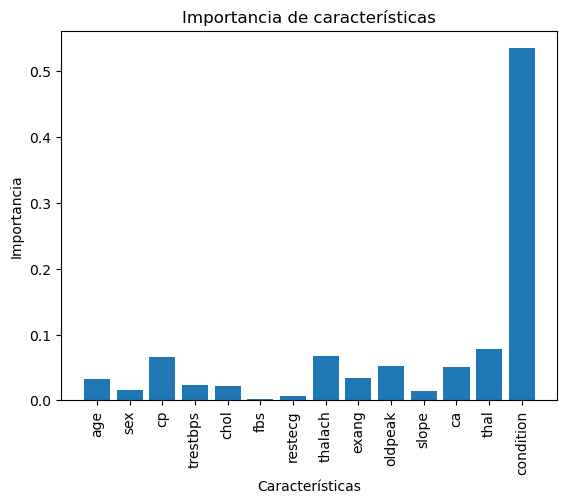

In [31]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Visualizar la importancia de las características
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características')
plt.show()


In [38]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de Regresión Logística
lr_model = LogisticRegression(max_iter=1000)

In [39]:

# Entrenar el modelo con los datos de entrenamiento
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [75]:
# Predecir en el conjunto de test
y_pred = lr_model.predict(X_test)

In [82]:
# Verificar las longitudes de los conjuntos de entrenamiento y prueba
print("Longitud de X_train:", len(X_train))
print("Longitud de X_test:", len(X_test))
print("Longitud de y_train:", len(y_train))
print("Longitud de y_test:", len(y_test))


Longitud de X_train: 148
Longitud de X_test: 149
Longitud de y_train: 148
Longitud de y_test: 149


In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar las métricas
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precisión: 1.0
Recall: 1.0
F1-score: 1.0


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [94]:
# 2. Entrenar un modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# 3. Obtener probabilidades predichas en el conjunto de prueba
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# 4. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print("Matriz de Confusión:")
print(conf_matrix)

In [ ]:
# 5. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Matriz de Confusión:
[[32  0]
 [ 0 28]]


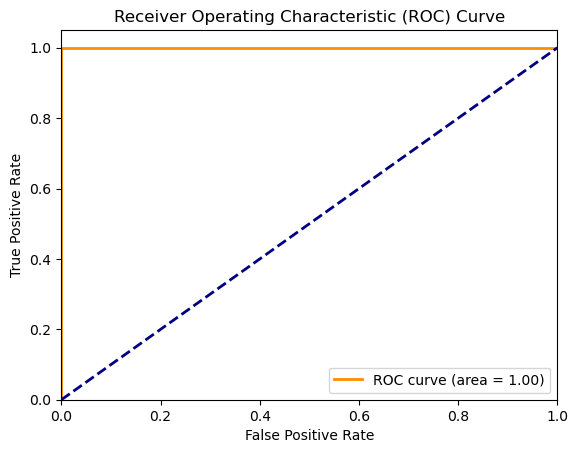

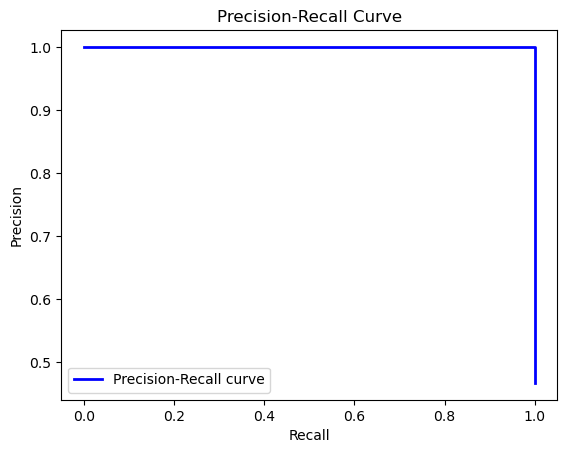

In [92]:
# 6. Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
